In [1]:
cd(@__DIR__)
include("../AR/utils/utils.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")

Plot_Both_Pheno_Dates (generic function with 1 method)

## Apple phenology model

Dormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

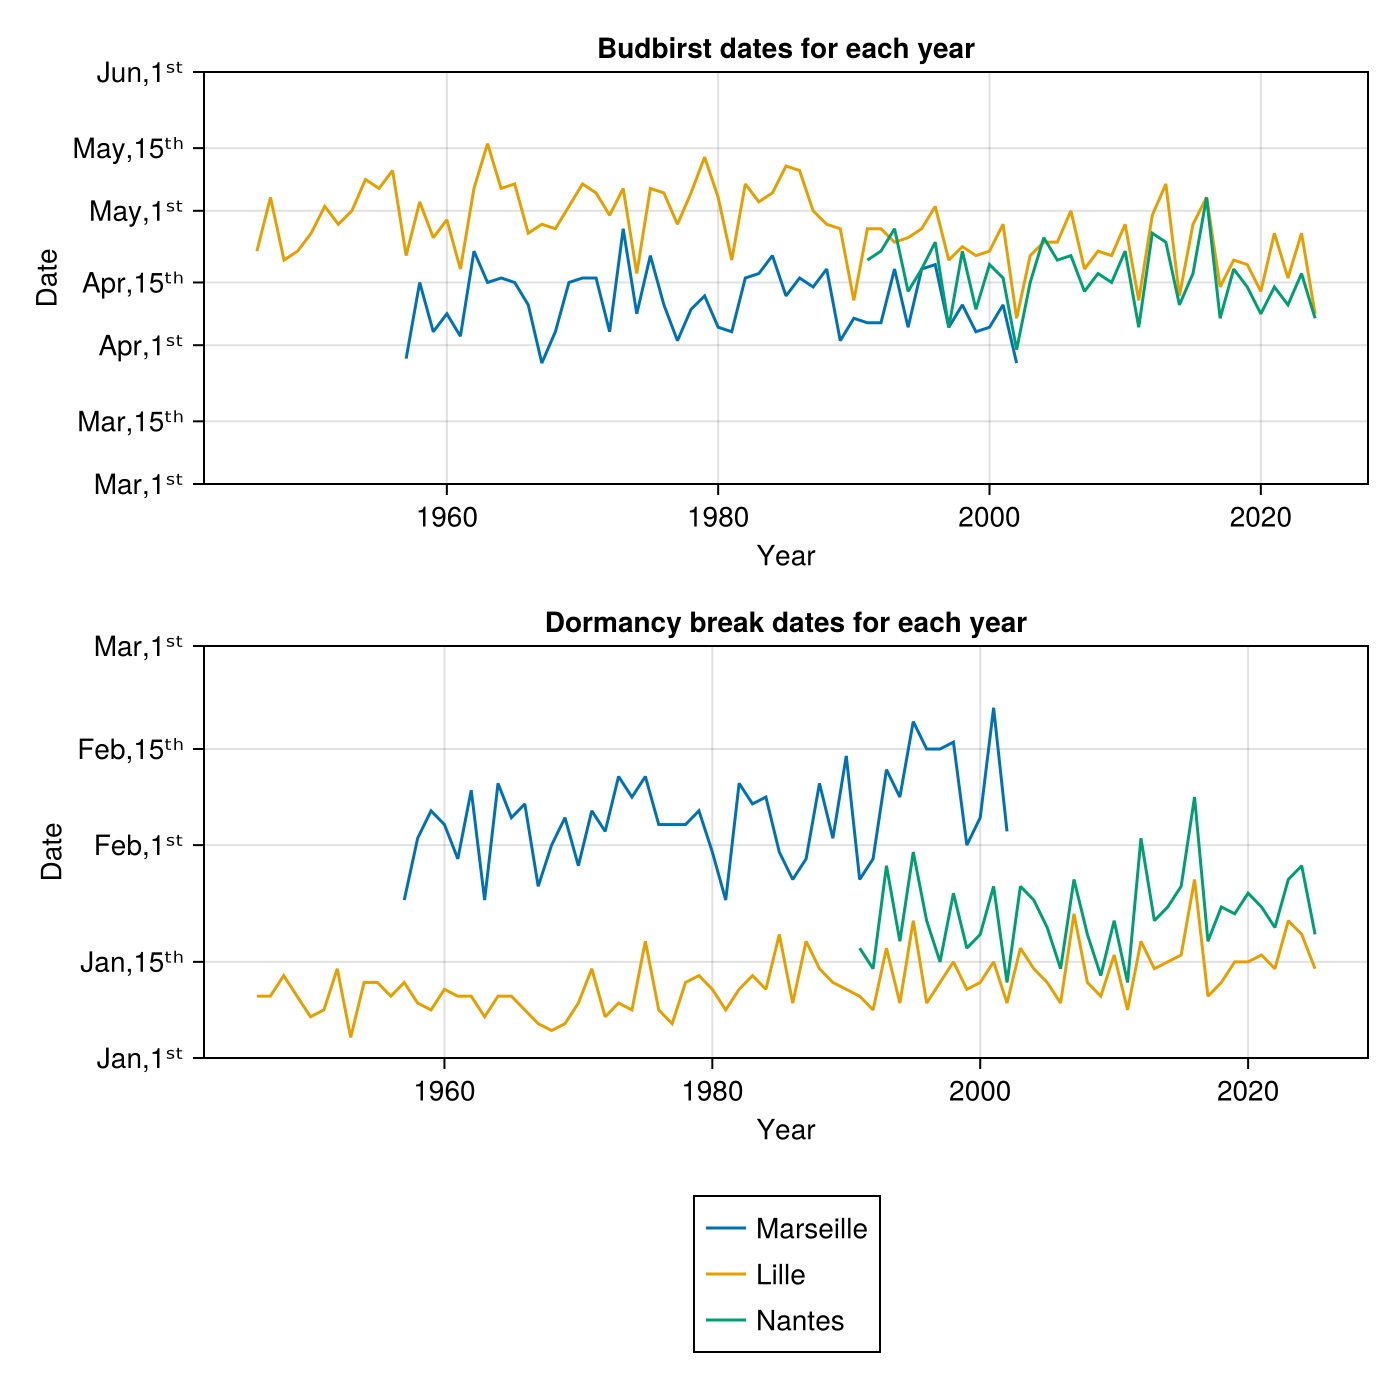

CairoMakie.Screen{IMAGE}


In [2]:
DB_Marseille, BB_Marseille = Apple_Phenology_Pred(initTG("TG_STAID000031.txt"))
DB_Lille, BB_Lille = Apple_Phenology_Pred(initTG("TG_STAID000737.txt"))
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG("TG_STAID000742.txt"))
fig = Plot_Both_Pheno_Dates([DB_Marseille, DB_Lille, DB_Nantes], [BB_Marseille, BB_Lille, BB_Nantes], (10, 30), labelvec=["Marseille", "Lille", "Nantes"])
save("Presentation/Apple_pheno.png",fig,; px_per_unit=2.0)
display(fig)

## Vine phenology model

Dormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

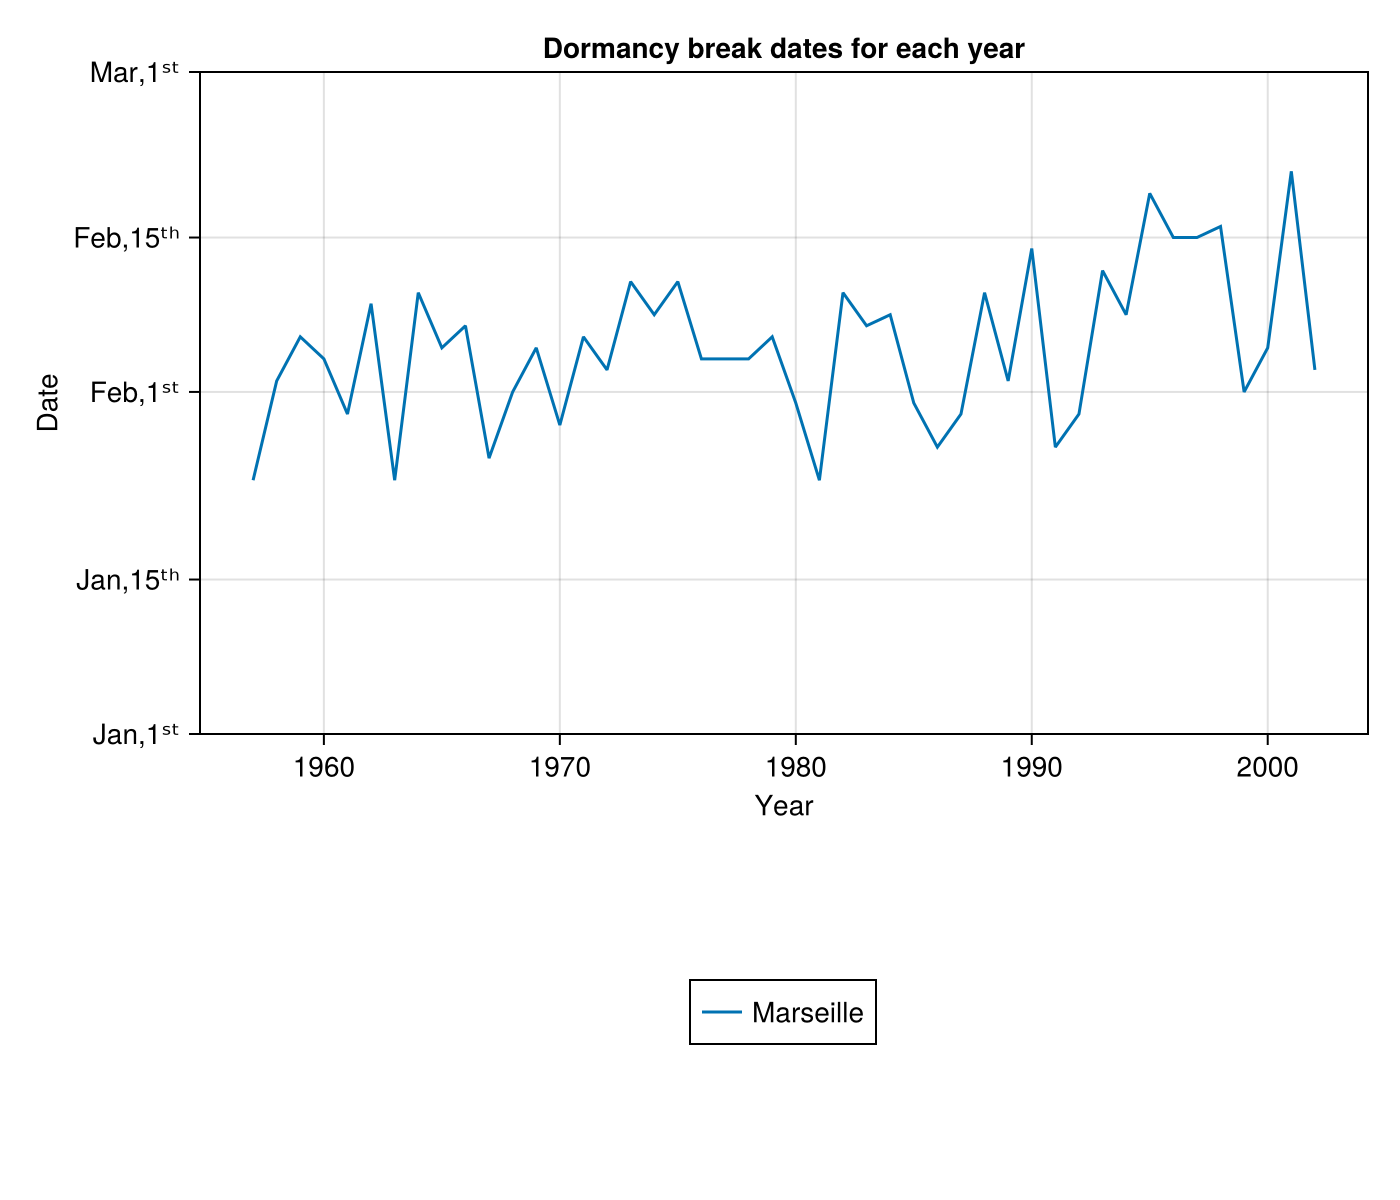

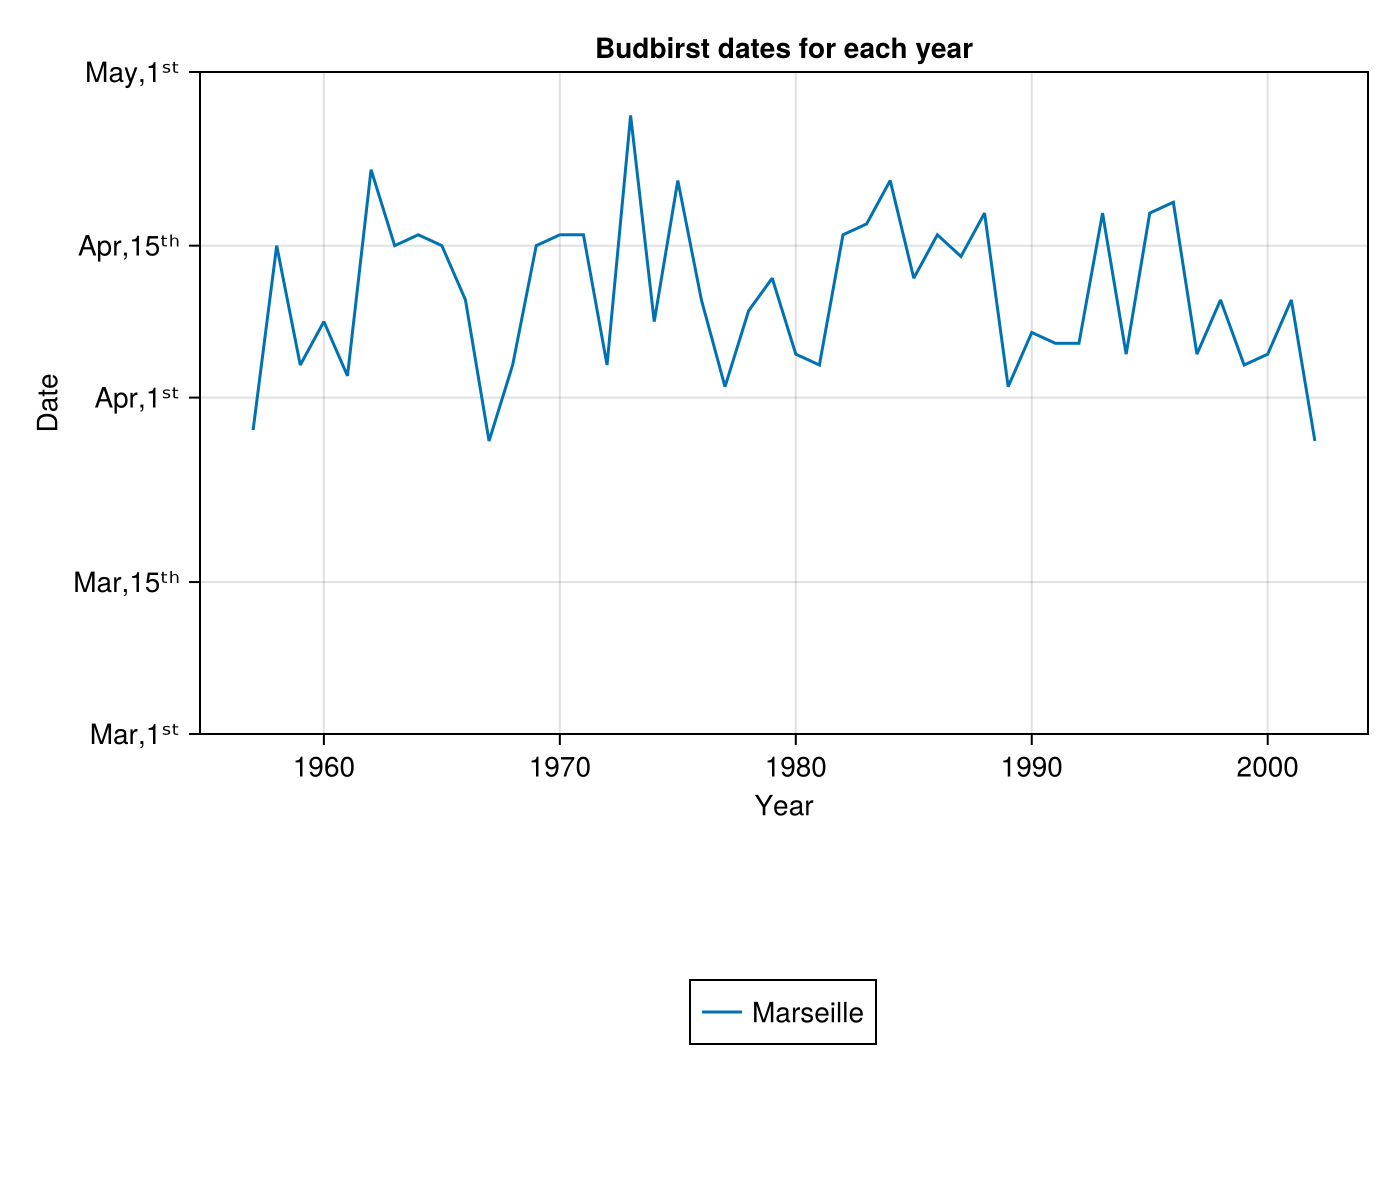

  21.838 ms (139550 allocations: 15.34 MiB)


CairoMakie.Screen{IMAGE}


In [3]:
include("PhenoPred.jl")
using BenchmarkTools

@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Dormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budbirst", labelvec=["Marseille"], BB=true))

Using a VinePhenoModel structure

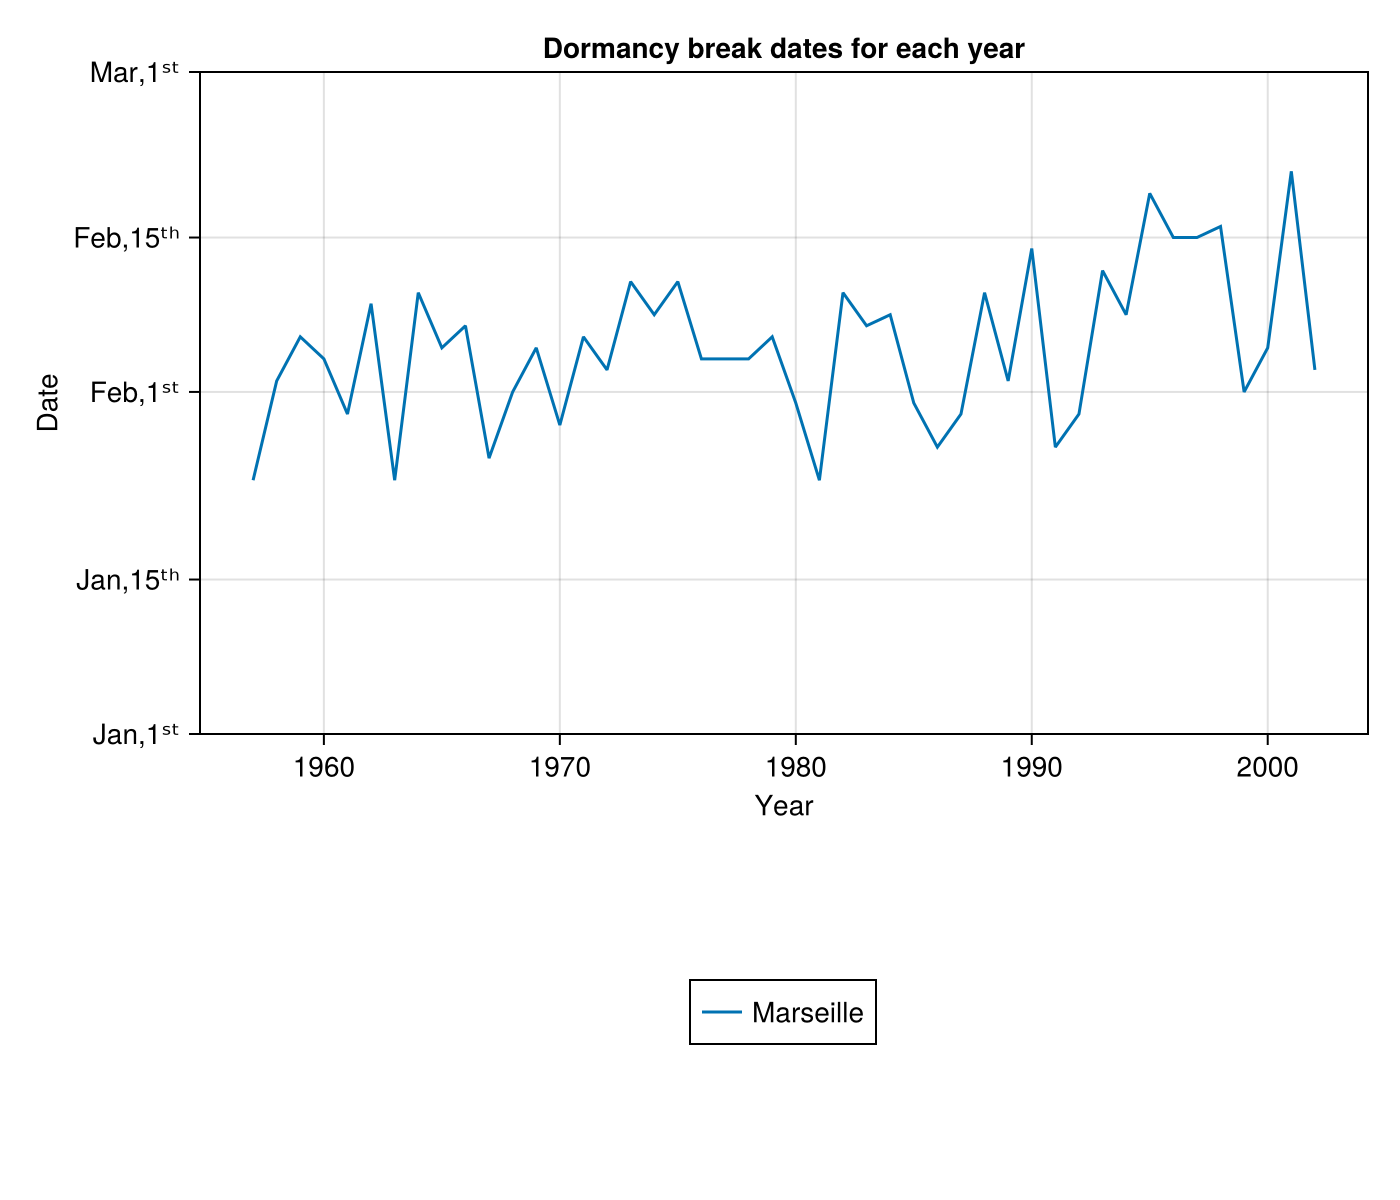

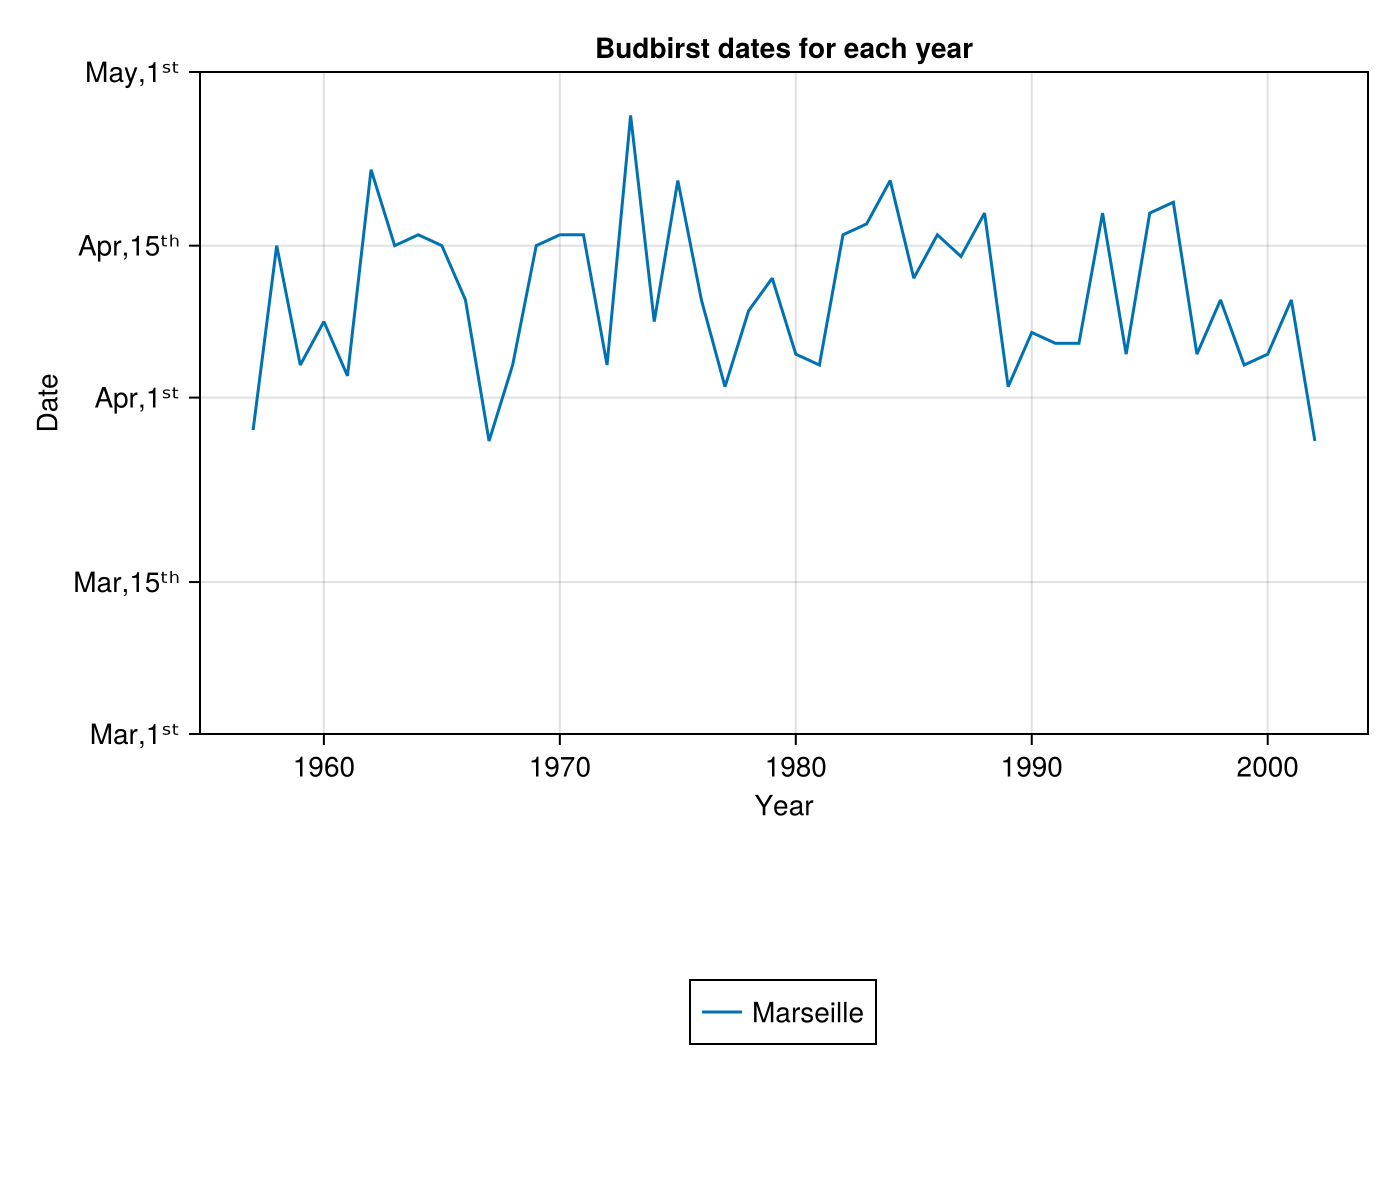

  33.839 ms (745975 allocations: 26.83 MiB)


CairoMakie.Screen{IMAGE}


In [4]:
@btime DB_Marseille, BB_Marseille = Vine_Phenology_Pred(InitVinePhenoModel("TN_STAID000031.txt", "TX_STAID000031.txt"))

display(Plot_Pheno_Dates([DB_Marseille], (8, 1), title="Dormancy break", labelvec=["Marseille"]))
display(Plot_Pheno_Dates([BB_Marseille], (8, 1), title="Budbirst", labelvec=["Marseille"]), BB=true)

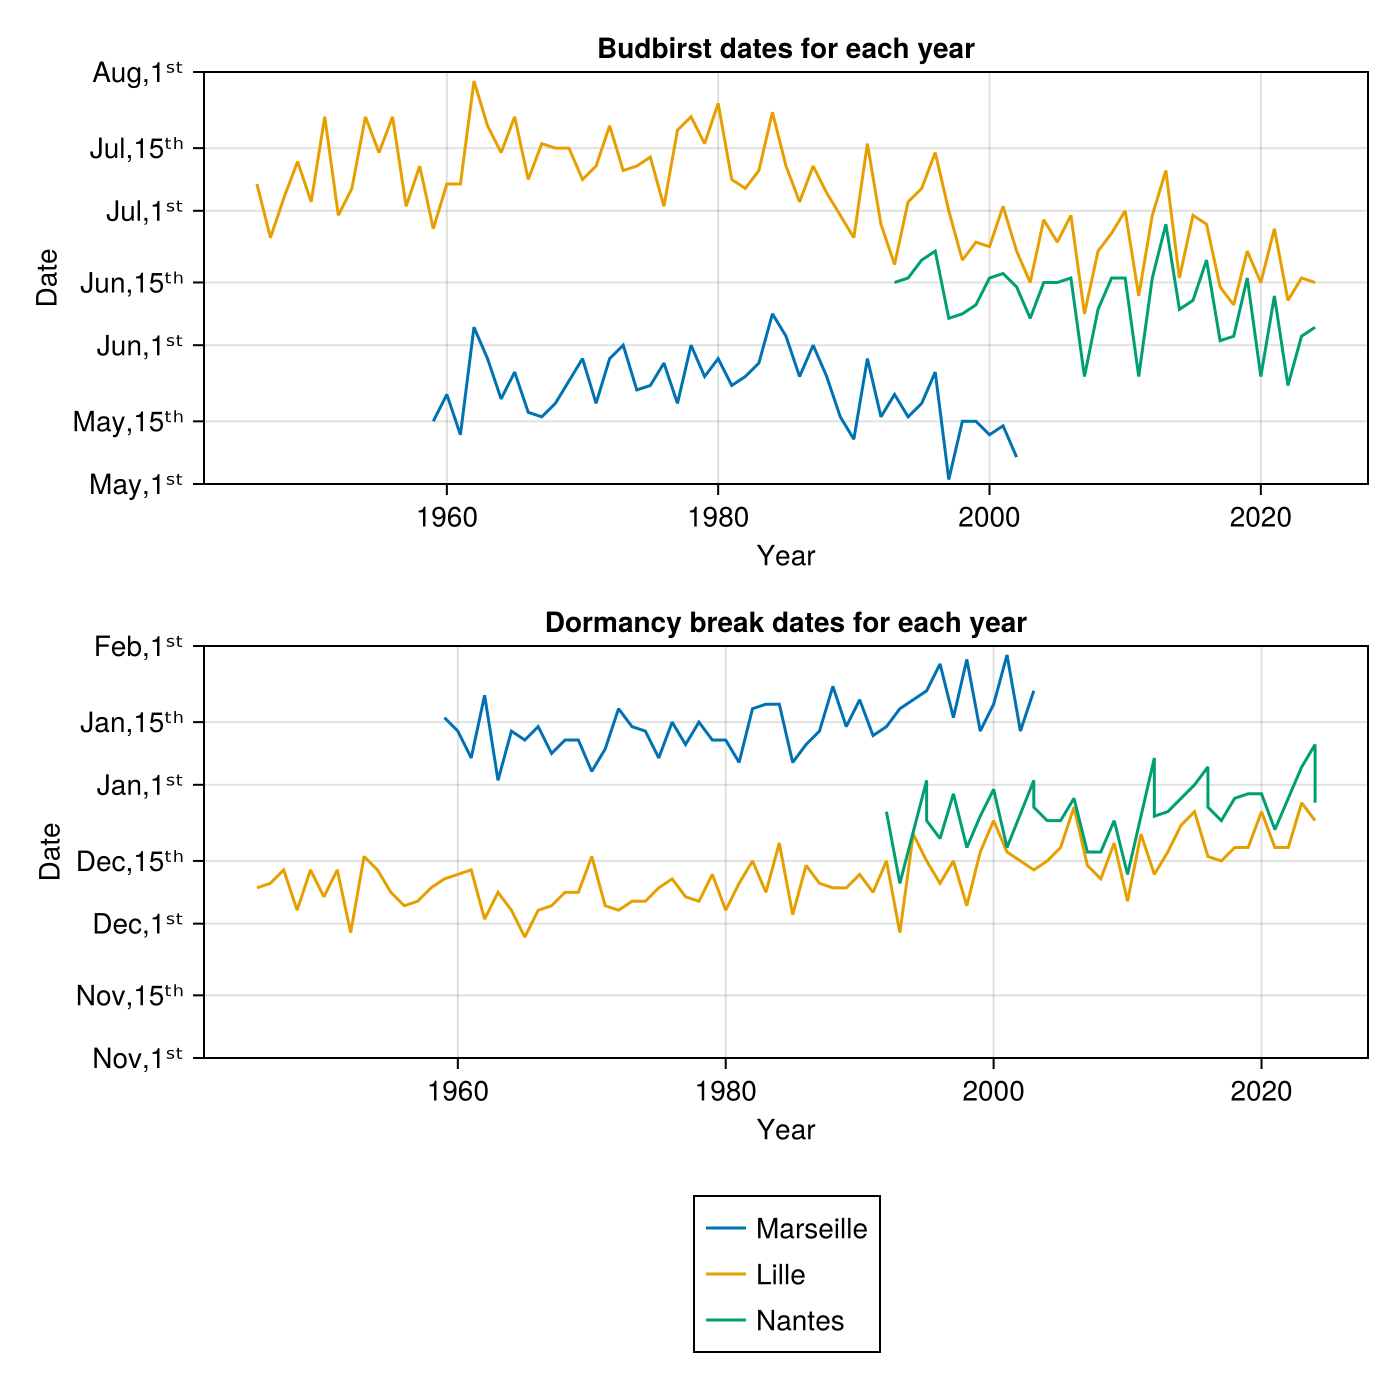

CairoMakie.Screen{IMAGE}


In [5]:
DB_Marseille, BB_Marseille = Vine_Phenology_Pred("TN_STAID000031.txt", "TX_STAID000031.txt")
DB_Lille, BB_Lille = Vine_Phenology_Pred("TN_STAID000737.txt", "TX_STAID000737.txt")
DB_Nantes, BB_Nantes = Vine_Phenology_Pred("TN_STAID000742.txt", "TX_STAID000742.txt")
fig = Plot_Both_Pheno_Dates([DB_Marseille, DB_Lille, DB_Nantes], [BB_Marseille, BB_Lille, BB_Nantes], (8, 1), labelvec=["Marseille", "Lille", "Nantes"])
save("Gvine_pheno.png",fig,; px_per_unit=2.0)
display(fig)

Phenology of apple with generated data from a model trained on Marseille records

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

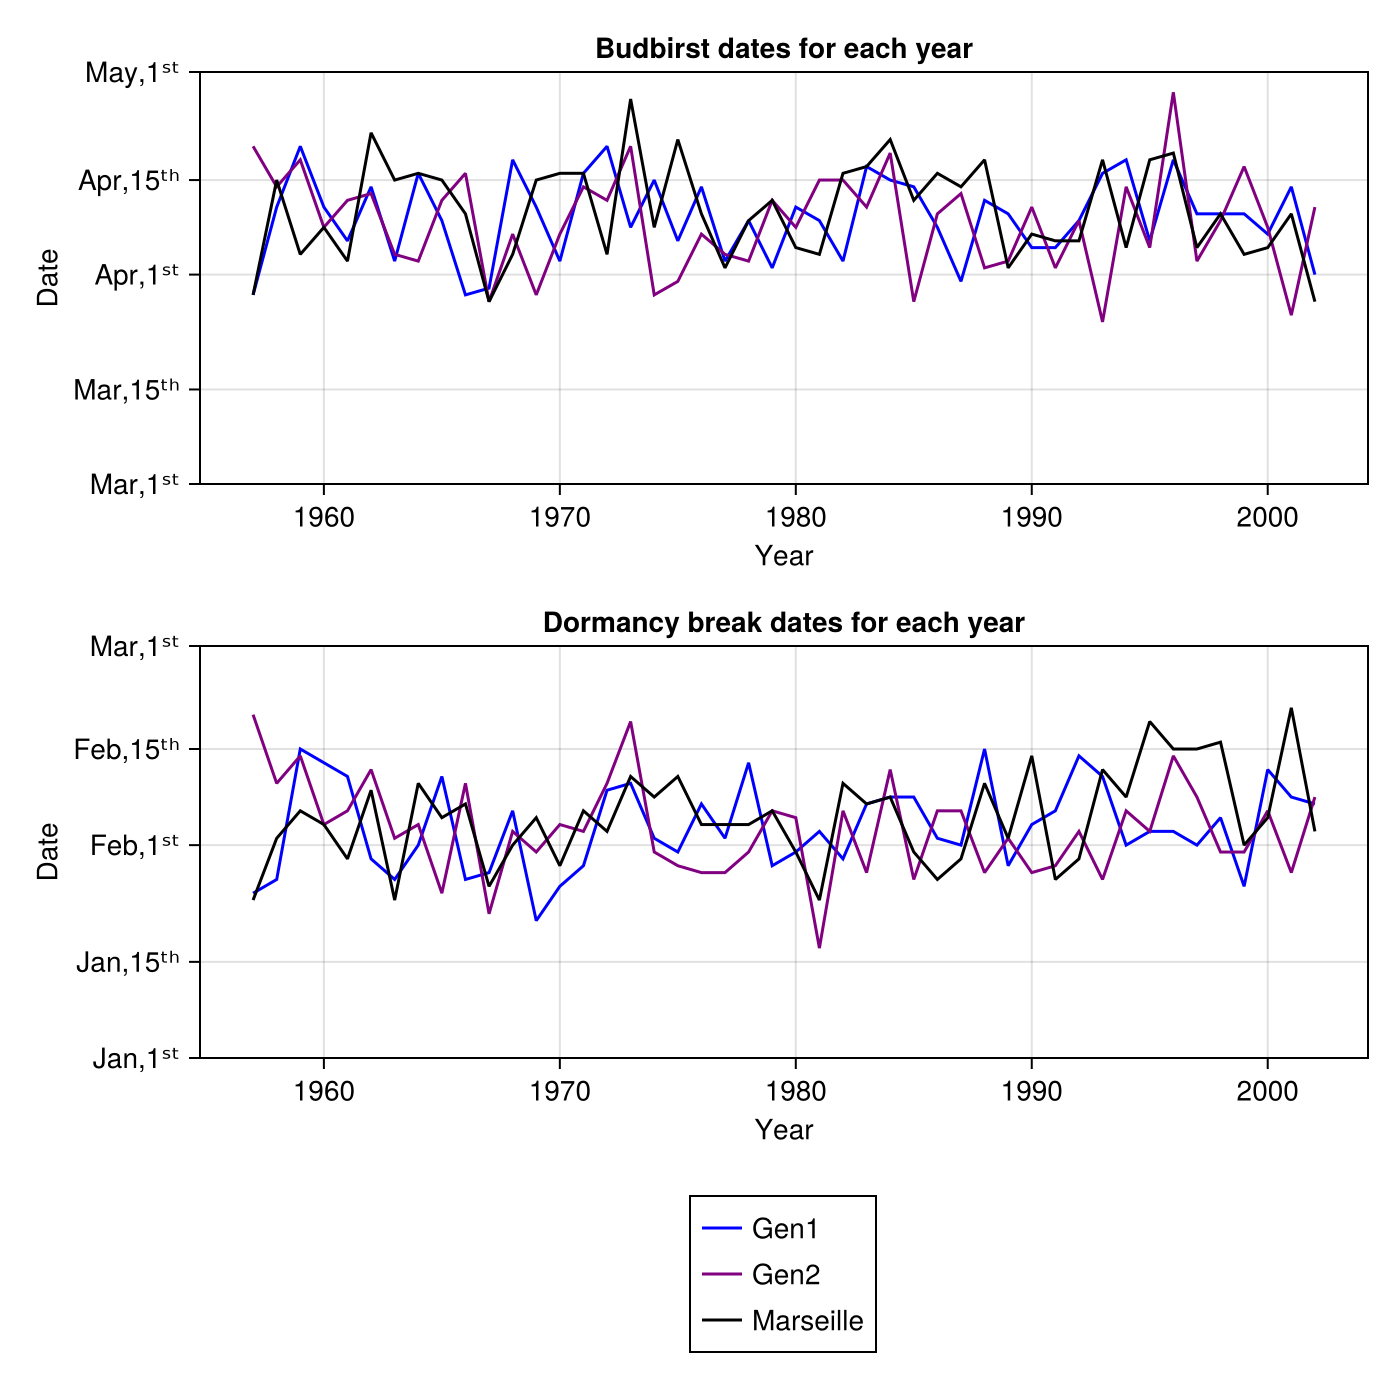

CairoMakie.Screen{IMAGE}


In [6]:
include("../AR/utils/Structure.jl")
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series("TG_STAID000031.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 2)

DB_Marseille, BB_Marseille = Apple_Phenology_Pred(x, date_vec)
Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack

colors = ["blue", "purple", "black"]
fig  = Plot_Both_Pheno_Dates([Tab[1, :]; [DB_Marseille]],[Tab[2, :]; [BB_Marseille]], (10, 30), labelvec=[["Gen$(i)" for i in 1:2]; "Marseille"], colors=colors)
save("Presentation/3phenos.png",fig,; px_per_unit=2.0)
display(fig)

Marseille

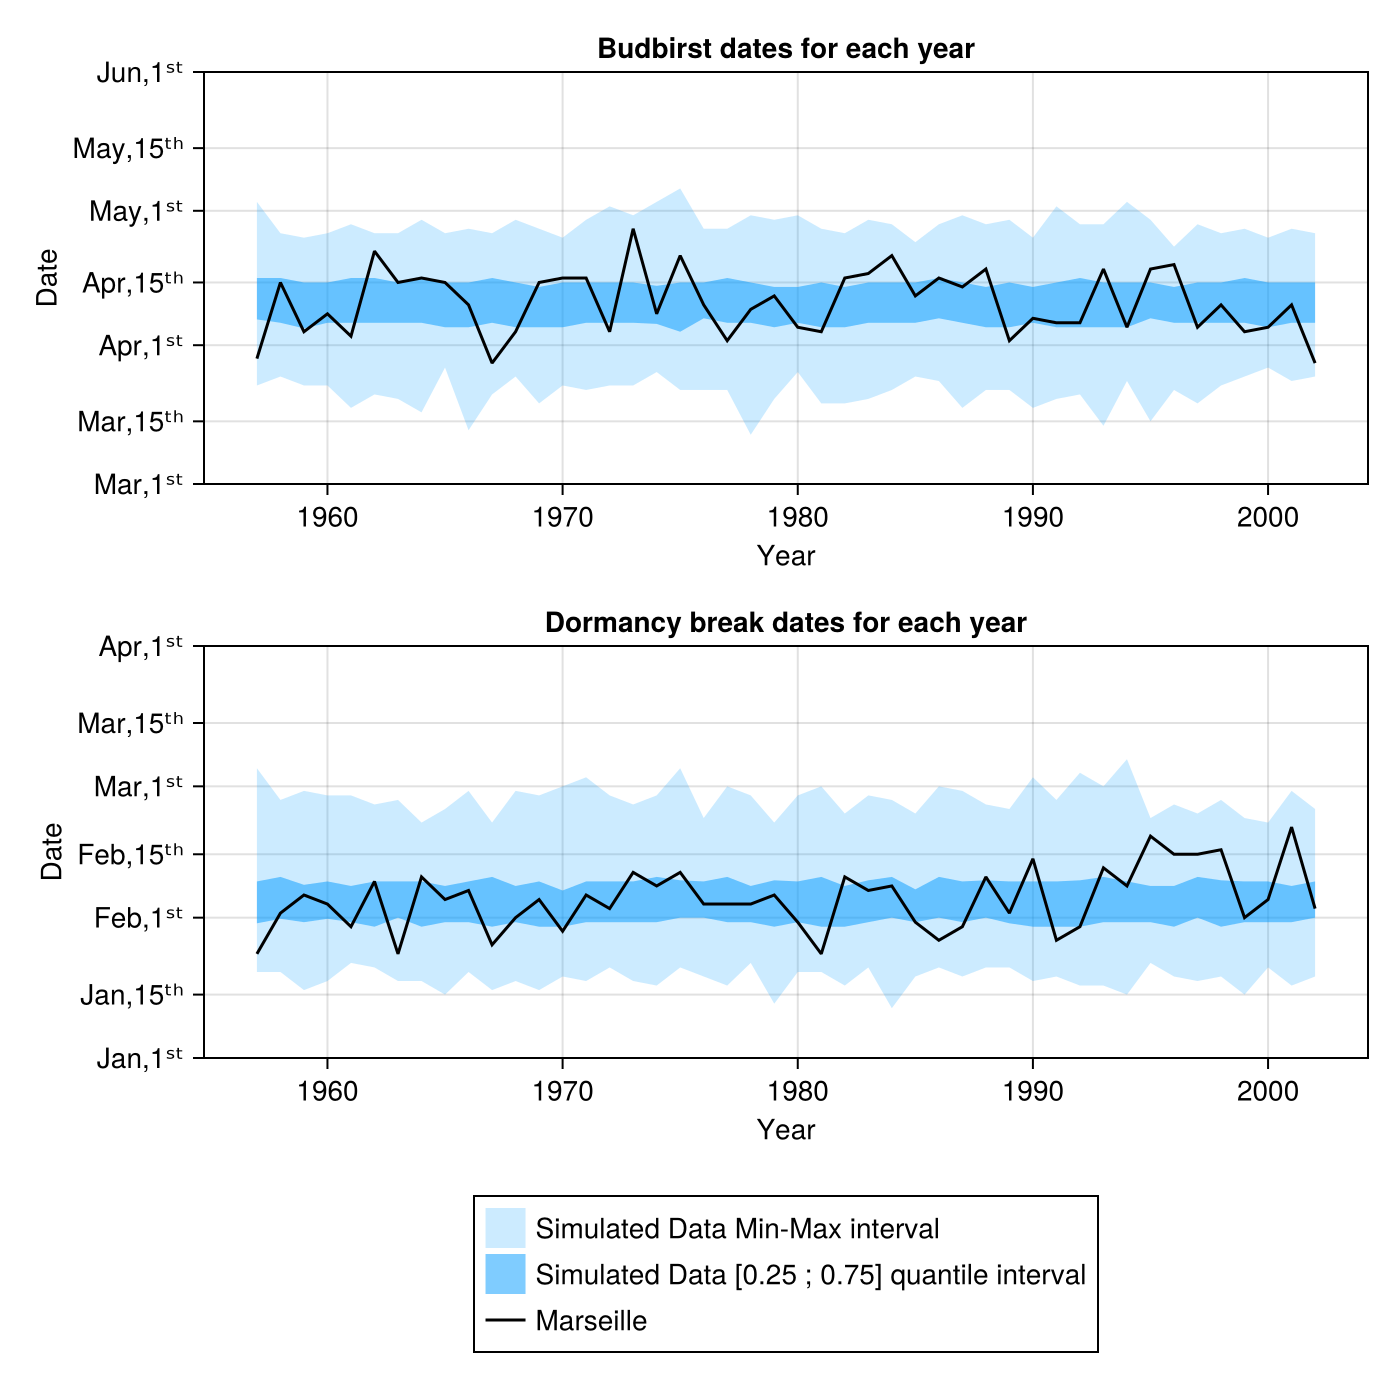

In [7]:
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series("TG_STAID000031.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Marseille, BB_Marseille = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Both_Pheno_Dates([DB_Marseille], [BB_Marseille], (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    labelvec=["Simulated Data Min-Max interval ", "Simulated Data [0.25 ; 0.75] quantile interval", "Marseille"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "black"]
)
display(fig)
save("Presentation/Marseille_sim.png",fig,; px_per_unit=2.0)

Lille

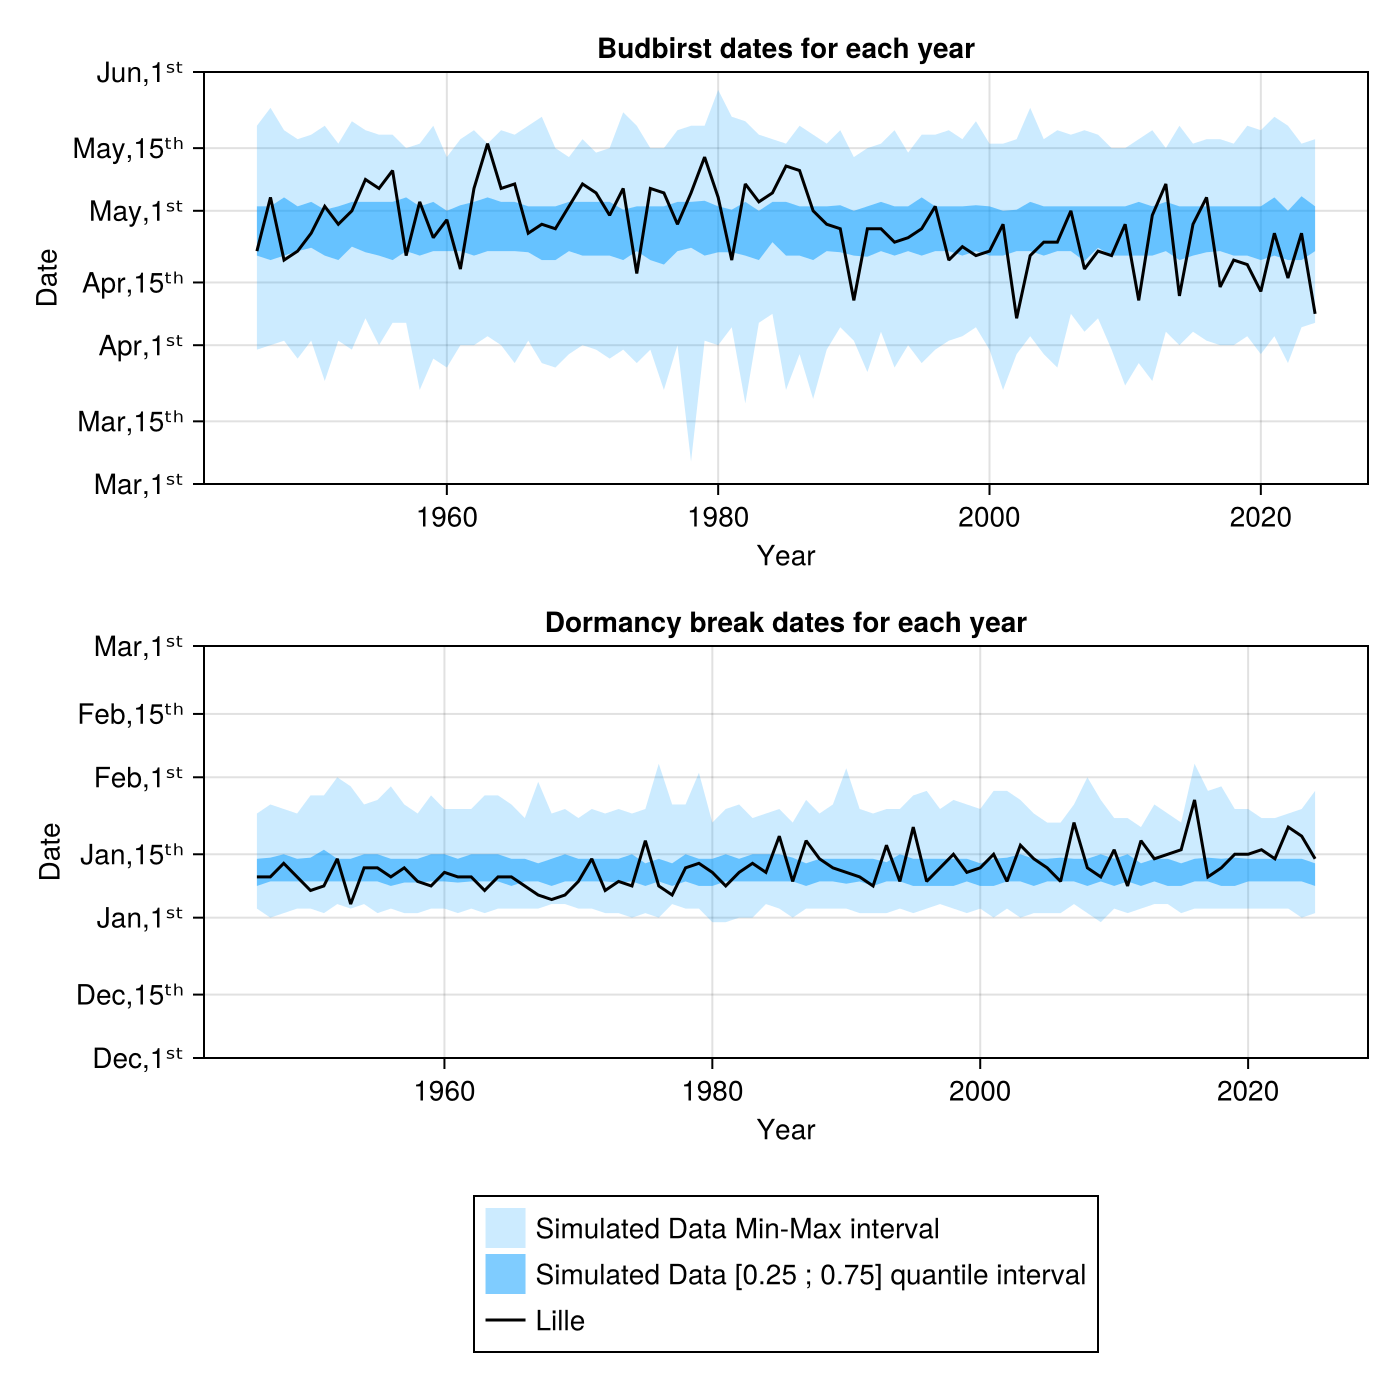

In [8]:
series = extract_series("TG_STAID000737.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Lille, BB_Lille = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Both_Pheno_Dates([DB_Lille], [BB_Lille], (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    labelvec=["Simulated Data Min-Max interval ", "Simulated Data [0.25 ; 0.75] quantile interval", "Lille"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "black"]
)
display(fig)
save("Presentation/Lille_sim.png",fig,; px_per_unit=2.0)

In [9]:
# ScaleDateCPO(date_) = ScaleDate(date_, (10,30), false)
# overall = reduce(vcat, Set_DB)
# overall[argmin(ScaleDateCPO.(overall))]
# io = open("test.txt", "w") do io
#   for x in overall
#     println(io, x)
#   end
# end

Nantes

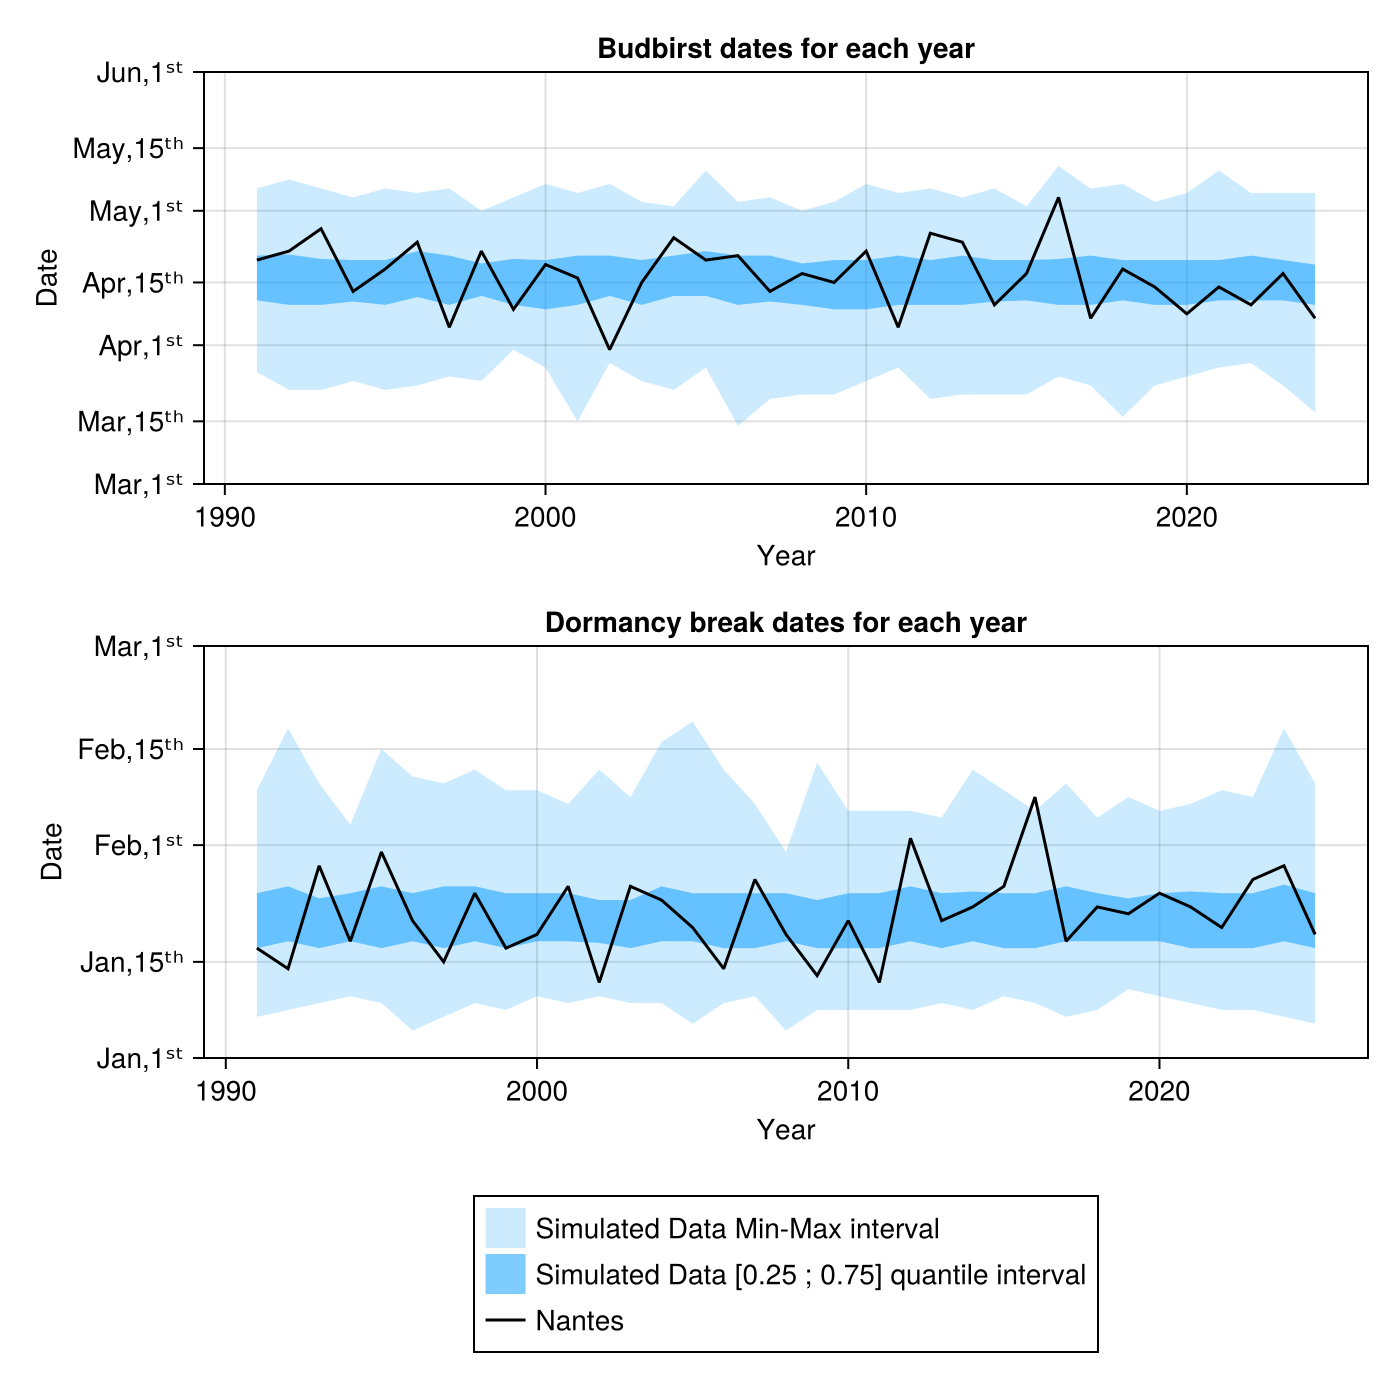

In [10]:
series = extract_series("TG_STAID000742.txt", plot=false)
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Both_Pheno_Dates([DB_Nantes], [BB_Nantes], (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    labelvec=["Simulated Data Min-Max interval ", "Simulated Data [0.25 ; 0.75] quantile interval", "Nantes"],
    colors=[("#009bff", 0.2), ("#009bff", 0.5), "black"]
)
display(fig)
save("Presentation/Nantes_sim.png", fig, ; px_per_unit=2.0)